# Modelos supervisados


Como vimos en la introducción al data science, hay una parte de los modelos que se categorizan como modelos de aprendizaje supervisado. 

En el aprendizaje supervisado, los algoritmos trabajan con datos “etiquetados” (labeled data), intentado encontrar una función que, dadas las variables de entrada (input data), les asigne la etiqueta de salida adecuada. El algoritmo se entrena con un “histórico” de datos y así “aprende” a asignar la etiqueta de salida adecuada a un nuevo valor, es decir, predice el valor de salida. 

Por ejemplo, un detector de spam, analiza el histórico de mensajes, viendo qué función puede representar, según los parámetros de entrada que se definan (el remitente, si el destinatario es individual o parte de una lista, si el asunto contiene determinados términos etc), la asignación de la etiqueta “spam” o “no es spam”. Una vez definida esta función, al introducir un nuevo mensaje no etiquetado, el algoritmo es capaz de asignarle la etiqueta correcta.




En los modelos supervisados, una de las principales características es que tenemos que realizar un ejercicio de etiquetado/clasificación previo para poder proporcionar al modelo los valores correctos para todo el set de datos de entrenamiento.  Dependiendo del tamaño del set de datos con el que estemos trabajando, este ejercicio puede llevar un tiempo considerable. 


Los modelos de aprendizaje supervisado se dividen en dos grandes categorías: 
- Regresión
- Clasificación

# Regresión

En la familia de modelos de regresión, destaca la regresión lineal. Este tipo de modelo busca predecir un valor real, que llamamos variable dependiente o variable objetivo, a partir de los valores que introducimos al modelo, que llamamos variables independientes o features. 



## Regresión lineal

Como acabamos de describir, la regresión lineal busca predecir el valor de la variable dependiente a partir de los valores de las variables independientes que le propocionamos al modelo. 

En la regresión lineal, se utiliza una línea para modelar la relación entre las variables independientes y la variable dependiente. 

En su forma más básica, la fórmula matemática que describe una regresión lineal es: $y = \beta_0 + \beta_1x$ , donde y es la variable dependiente que estamos prediciendo, x es la variable independiente de entrada, $\beta_0$ es un parámetro conocido como interceptor y $\beta_1$ es el coeficiente asociado a x.

Juntos, $\beta_0$  y $\beta_1$ son lo que llamamos los coeficientes del modelo o hiperparámetros del modelo. Para crear el modelo de regresión lineal, debemos aprender cuales son los mejores valores para esos coeficientes para conseguir las mejores predicciones. 

Normalmente contamos con varias variables independientes de entrada, con lo que la fórmula se podría extender para tener en cuenta todas las variables de entrada como: $y= \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + .....$

En la regresión lineal, los coeficientes del modelo se calculan utilizando el criterio de mínimos cuadrados, que matemáticamente nos permite encontrar la línea que minimiza la suma de la cuadrado de las distancias entre los puntos que tenemos en el set de entrenamiento y la línea que representa el modelo. 

La regresión lineal es una forma rápida de conseguir predicciones en sets de datos que presentan correlación lineal, se ejecuta de forma muy rápida y, al ser un modelo sencillo, sirve como referencia a la hora de medir el desempeño de otros modelos 

Vamos a ver un ejemplo de utilización de un modelo de regresión lineal:

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
# vamos a utilizar uno de los datasets mas famosos para regresiones lineales,
# el dataset de precios de viviendas en boston
boston = datasets.load_boston()

In [4]:
#Vamos a ver el número de columnas y de filas que tiene el dataset
boston.data.shape

(506, 13)

In [5]:
# Vamos a ver las variables independientes que tenemos de entrada
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# dado que es más facil trabajar con un Dataframe de pandas, vamos a cargar los datos en uno
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Vamos a definir la variable objetivo, el precio de la casa en este caso como y
y = boston.target

¿Qué otras cosas podríamos mirar de nuestros datos antes de empezar con la creación del modelo? EDA

In [8]:
# Vamos a crear nuestro primer modelo de regresión lineal
lr = LinearRegression()

In [9]:
# Para entrenar nuestro modelo solamente tenemos que llamar al método fit 
# que nos proporcionan todos los modelos de scikit-learn y pasar los datos correspondientes
lr.fit(df, y)

LinearRegression()

In [10]:
# hagamos la prediccion para nuestros datos
prediction = lr.predict(df)

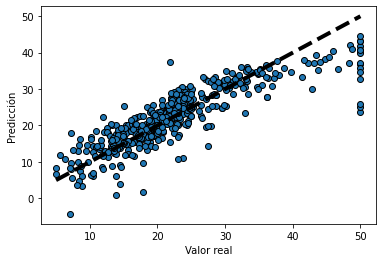

In [11]:
# Vamos a calcular el error que tiene nuestro modelo y a visualizar ese error 
# mostrando los valores reales del precio de las casas y los valores predichos por el modelo

fig, ax = plt.subplots()
ax.scatter(y,prediction,edgecolors=(0,0,0))
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Predicción')
plt.show()


In [12]:
mse = mean_squared_error(y,prediction)
mse

21.894831181729202

Eso tiene muy buena pinta! El MSE tiene un valor bajo como podríamos esperar viendo el gráfico que hemos creado. Sin embargo, qué está mal del método que hemos utilizado?

Correcto, tenemos **overfitting**! Al haber utilizado todo el dataset para entrenar el modelo y luego pedirle que haga predicciones sobre el mismo dataset, la posibilidad de cometer errores es pequeña, pero cuando el modelo reciba datos que no ha visto nunca probablemente cometa grandes errores.

Tenemos que separar nuestros datos para crear un set de entrenamiento y un set de pruebas. El set de entrenamiento es el que pasaremos a nuestro modelo para que aprenda a resolver el problema que tenemos y el set de pruebas lo utilizaremos para validar lo bien o lo mal que lo está haciendo el modelo al pasarle datos que no ha visto nunca y comparar sus predicciones con los valores que tenemos del set de pruebas. 

In [13]:
# vamos a crear los sets de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123)

La función train test split nos ayuda a generar los sets de entrenamiento y pruebas de forma fácil. Coge muestras aleatorias de todo el set de datos para construir nuestos sets, de modo que no tengamos dependencias de la posición de los datos para que caigan en el set de entrenamiento o el de pruebas y tener una muestra más variada de todos los datos que tenemos en nuestro set. El parámetro test_size determina cuántos datos guardamos para el set de pruebas. Tenemos que guardar algunos datos para evitar el overfitting pero a la vez queremos darle cuantos más datos mejor al modelo para que pueda aprender más. Lo habitual es guardar entre un 15% y un 20% de los datos para el set de pruebas. 

El parámetro random_state es importante porque fija la semilla para la generación de los números aleatorios que genera la función train_test_split para separar nuestros datos. Al fijar esa semilla, nos aseguramos de que todas las veces que ejecutemos esa separación de los datos vamos a tener los mismos registros en el set de entrenamiento y en el set de pruebas, de modo que podemos compartir nuestros experimentos con otras personas y esas personas podrán reproducir nuestros resultados. 

In [14]:
# creemos una nueva instancia del modelo 
lr_new = LinearRegression()

In [15]:
# entrenamos el modelo con el set de entrenamiento
lr_new.fit(X_train, y_train)

LinearRegression()

In [16]:
# Generamos predicciones para el set de pruebas
prediction_new = lr_new.predict(X_test)

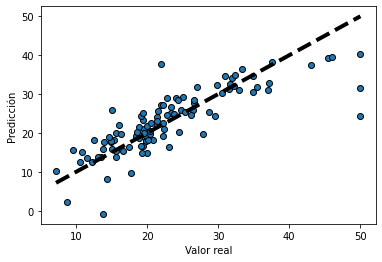

In [17]:
# Veamos la representación de los valores reales comparados con los valores 
# predichos por el modelo y luego calculemos el MSE
fig, ax = plt.subplots()
ax.scatter(y_test,prediction_new,edgecolors=(0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Predicción')
plt.show()

In [18]:
mse_new = mean_squared_error(y_test,prediction_new)
mse_new

28.192485758469314

Aunque ahora tenemos un MSE mayor, el modelo funciona mejor frente a nuevas observaciones y ya no sufre de overfitting

## Regularizaciones de Lasso y Ridge (Regularizaciones L1 y L2)

Las regularizaciones de Lasso y Ridge que se pueden aplicar a los modelos de regresión lineal son técnicas que permiten reducir la complejidad de los modelos y prevenir la aparición de overfitting en el modelo de regresión lineal. 

Sin entrar en las definiciones matemáticas de estas regularizaciones, simplemente deberíamos quedarnos con las siguientes intuiciones: 
- **La regularización de Ridge** (también conocida como regularización L2) se debe aplicar si vemos que los coeficientes de nuestros modelos son muy altos, ya que ayuda a reducir dichos coeficientes y así reducir la variabilidad del modelo que nos lleva al overfitting
- La regularización de Lasso (también conocida como regularización L1) se debe aplicar si tenemos un número alto de variables independientes que introducimos a nuestro modelo de regresión lineal, dado que esta regularización ayuda a seleccionar las variables independientes más importantes para las predicciones y reduce el valor total de los coeficientes de las variables independientes para evitar el overfitting, llegando a poner a cero los coeficientes de aquellas variables independientes menos relevantes. 

Para aplicar las regularizaciones de Ridge y de Lasso, podemos utilizar las implementaciones del algoritmo de la regresión lineal con cada una de las regularizaciones que nos ofrece scikit-learn, utilizando el parámetro alpha que ofrecen ambas implementaciones para controlar el impacto de la regularización en el resultado final. 

In [19]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

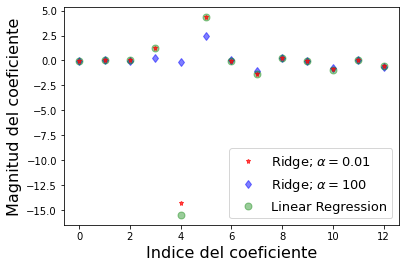

In [20]:
# Vamos a ver el efecto de la regularización de Ridge
boston = datasets.load_boston()

# Cargamos los datos en un data frame
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Dividimos los datos entre el set de entrenamiento y el de pruebas
X_train, X_test, y_train, y_test = train_test_split(boston_df, boston.target, test_size=0.2, random_state=123)

#Preparamos el modelo de regresión lineal sin regularización
lr = LinearRegression()
lr.fit(X_train,y_train)

# Preparamos el modelo de regresión con regularización de Ridge y un parámetro alpha de 0.1
rr = Ridge(alpha=0.1)
rr.fit(X_train,y_train)

# Vamos a montar un segundo modelo de regresión con regularización de Ridge,
# pero esta vez con un valor de alpha mucho más grande
rr_100 = Ridge(alpha=100)
rr_100.fit(X_train,y_train)

# Vamos a ver los errores que cometen los tres modelos para el set de entrenamiento y para el de pruebas
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test,y_test)

ridge_train_score = rr.score(X_train, y_train)
ridge_test_score = rr.score(X_test,y_test)

ridge_100_train_score = rr_100.score(X_train, y_train)
ridge_100_test_score = rr_100.score(X_test, y_test)

# Finalmente dibujemos los coeficientes de los distintos modelos 
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr_100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Indice del coeficiente',fontsize=16)
plt.ylabel('Magnitud del coeficiente',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()


Podemos ver que un valor pequeño para alpha en la regularización de Ridge hace que los coeficientes del modelo estén poco restringidos y el valor de los coeficientes es prácticamente igual que el de los coeficientes del modelo de regresión sin regularización. 
En cambio, para un valor alto de alpha, como puede ser 100, vemos que el valor de los coeficientes del modelo está más restringido y todos los coeficientes se encuentran en torno a cero. Ahí podemos ver el efecto de reducción de los valores de los coeficientes al aplicar la regularización de Ridge.

LR training score:  0.7712610207978714
LR test score:  0.7622146624106332
------------------------------------------------------------------------------------------------------
Lasso training score:  0.5505114275132479
Lasso test score:  0.5496710489491345
Número de variables utilizadas:  3
------------------------------------------------------------------------------------------------------
Lasso con alpha 0.01 training score:  0.682707549943812
Lasso con alpha 0.01 test score:  0.7164421059379041
Número de variables utilizadas:  8
------------------------------------------------------------------------------------------------------
Lasso con alpha 0.0001 training score: 0.7598908199493224
Lasso con alpha 0.0001 test score:  0.7615250331156784
Número de variables utilizadas: 21


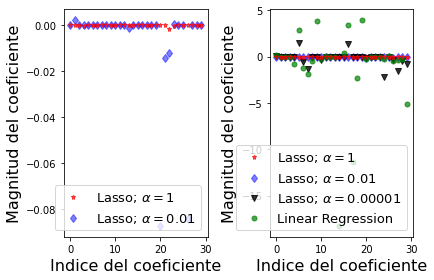

In [21]:
# Ahora vamos a ver un ejemplo de aplicación de la regularización de Lasso
# Utilizamos el dataset sobre cancer que tiene scikit-learn porque tiene un número mayor
# de variables independientes comparadas con el dataset sobre los precios de Boston

cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Hacemos la división de los datos entre el set de entrenamiento y el de pruebas
X_train, X_test, y_train, y_test = train_test_split(cancer_df, cancer.target, test_size=0.2, random_state=123)

# Empezamos por un modelo de regresión sin regularización
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train,y_train)
lr_test_score = lr.score(X_test,y_test)

print("LR training score: ", lr_train_score)
print("LR test score: ", lr_test_score)
print("------------------------------------------------------------------------------------------------------")

# Ahora vamos a crear un modelo con regularización de Lasso con un parámetro alpha alto
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
coeficientes = np.sum(lasso.coef_!=0)

print("Lasso training score: ",lasso_train_score)
print("Lasso test score: ", lasso_test_score)
print("Número de variables utilizadas: ", coeficientes)
print("------------------------------------------------------------------------------------------------------")

# ahora vamos a crear un model con regularización de Lasso con un parámetro alpha pequeño
lasso001 = Lasso(alpha=0.01)
lasso001.fit(X_train, y_train)

lasso001_train_score = lasso001.score(X_train, y_train)
lasso001_test_score = lasso001.score(X_test, y_test)
lasso001_coeficientes = np.sum(lasso001.coef_!=0)

print("Lasso con alpha 0.01 training score: ", lasso001_train_score)
print("Lasso con alpha 0.01 test score: ", lasso001_test_score)
print("Número de variables utilizadas: ", lasso001_coeficientes)
print("------------------------------------------------------------------------------------------------------")

# Finalmente vamos a crear un modelo con regularización de Lasso con un valor de alpha muy pequeño
lasso00001 = Lasso(alpha=0.0001)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("Lasso con alpha 0.0001 training score:", train_score00001)
print("Lasso con alpha 0.0001 test score: ", test_score00001)
print("Número de variables utilizadas:", coeff_used00001)


plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) 
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') 

plt.xlabel('Indice del coeficiente',fontsize=16)
plt.ylabel('Magnitud del coeficiente',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) 
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') 
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Indice del coeficiente',fontsize=16)
plt.ylabel('Magnitud del coeficiente',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()


Como podemos ir viendo de los resultados que nos ofrecen el ejemplo anterior, el uso de un valor alto de alpha para un modelo de regresión con regularización hace que el número de variables independientes que se tienen en cuenta en el modelo disminuya claramente frente al número de variables independientes disponibles.  Según se va disminuyendo el valor de alpha, el número de variables independientes que se utilizan aumenta, reduciendo la restricción que aplica la regularización. 
De los gráficos también podemos ver que los valores altos de alpha hacen que los coeficientes del modelo vean sus valores reducidos significativamente y se encuentren en valores cercanos a cero.

# Clasificación

Los modelos de clasificación son la otra gran familia de modelos dentro de los modelos de aprendizaje supervisado. 

En los modelos de clasificación buscamos asignar una etiqueta de una categoría a los datos que entregamos al modelo. 

Hay dos tipos de modelos de clasificación: 
- **Clasificadores binarios**: En los que solamente existen dos posibles categorías de salida. 
- **Clasificadores multiclase**: En los que existen tres o más posibles categorías de salida. 

Vamos a ver en más detalle tres tipos de modelos de clasificación: regresión logística, bosques aleatorios y modelos de ensamblado. 




A diferencia de los modelos de regresión donde calculamos el error que tienen las predicciones del modelo comparado con el valor real de los datos, en los modelos de clasificación utilizamos otras métricas para evaluar cómo de bien está funcionando un modelo. Veámos las distintas métricas que podemos utilizar. 

### Matriz de confusión

La matriz de confusión nos permite visualizar fácilmente cómo de bien está funcionando nuestro modelo de clasificación. Como su propio nombre indica es una matriz donde las columnas son las categorías predichas por el modelo y las filas son las cateogorías reales de los datos. Los valores dentro de la matriz son el número de datos para los que se cumplen el valor real y el valor predicho por el modelo. 

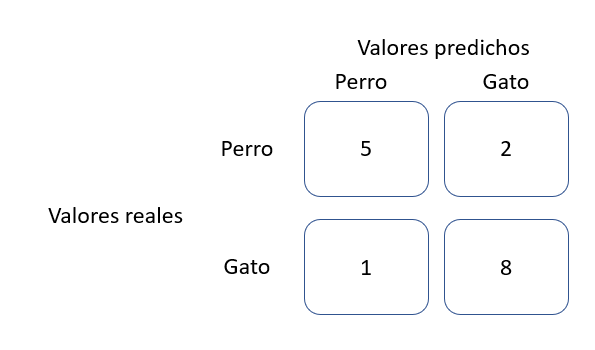

En el ejemplo que tenemos encima, tenemos dos categorías para nuestro modelo de clasificación. Tomando como ejemplo la primera fila, la matriz de confusión nos está diciendo que para nuestro modelo hay 5 perros que han sido clasificados como perros y 2 perros que han sido clasificados como gatos. El segunda fila funciona igual. 

La matriz de confusión, además de darnos una idea rápida sobre el desempeño de nuestro modelo, también nos ayuda a calcular cuatro métricas importantes: 
- **verdaderos positivos**: Son aquellos datos donde la categoría positiva coincide en la predicción y en la realidad
- **verdaderos negativos**: Son aquellos datos donde la categoría negativa coincide en la predicción y en la realidad 
- **falsos positivos**: Son aquellos datos donde el modelo predice la categoría positiva pero en realidad tienen la categoría negativa
- **falsos negativos**: Son aquellos datos donde el modelo predice la categoría negativa pero en realidad tienen la categoría positiva

Por convención, se asume que la categoría de la primera columna es la categoría positiva (en nuestro ejemplo los perros) y la categoría de la segunda columna es la categoría negativa (en nuestro ejemplo los gatos). 

Estos calculos se pueden expandir para los casos en los que tenemos más de dos categorías (clasificadores multiclase). 

### F1-score, precisión y exhaustividad (recall)

Estas medidas nos ayudan a evaluar también cómo de bien está funcionando nuestro clasificador. 

La precisión nos ayuda a evaluar cómo de efectivo es el modelo a la hora de encontrar los valores para una categoría en concreto. Se define como el porcentaje de valores correctos que has conseguido predecir sobre el total de las predicciones positivas que has hecho.  Siguiendo con los conceptos que hemos visto antes en la matriz de confusión, la precisión se define como: $$ precision = \dfrac{positivos\quad verdaderos}{(positivos\quad verdaderos + falsos\quad positivos)} $$ 

La exhaustividad (recall) nos ayuda a saber cómo de efectivo es el modelo a la hora de conseguir acertar las categorías de los datos. Se define como el porcentaje de valores correctos que has conseguido predecir sobre el total de valores correctos que hay en los datos. Lo podemos definir como: $$ exhaustividad = \dfrac {positivos\quad verdaderos}{(positivo\quad verdaderos + falsos\quad negativos)}$$

Por último, el F1-score nos combina los valores de precisión y exhaustividad (recall), dándonos una visión global de la efectividad del modelo. Matemáticamente, se define como el la media armónica entre precisión y exhaustividad (recall): $$ F1 = 2 * \dfrac{(precision * exhaustividad)}{(precision + exhaustividad)}$$

### Curva ROC / AUC

La curva ROC (Receiver Operator Characteristic) es una medida que podemos calcular y pintar que nos relaciona las medidas de precision y exhaustividad (recall) que hemos definido antes. Esta relación nos proporciona una curva que podemos pintar en una gráfica y que nos permite conocer cómo de bien se está comportando nuestro modelo. 

Un modelo que eligiese categorías de forma aleatoria generaría una línea diagonal perfecta en el espacio de precisión y exhaustividad (recall). Para saber si nuestro modelo está siendo efectivo, la curva ROC representada debe quedar por encima de esta línea diagonal.  

Aparte de tener una representación de la curva ROC y la intuición que nos dice si el modelo está siendo efectivo o no, también podemos calcular la medida del área bajo la curva (area under the curve o AUC). Esto simplemente es el área que queda por debajo de nuestra curva ROC en la representación. El valor máximo de esta medida es 1 para un clasificador perfecto y por lo tanto cuanto más nos acerquemos a ese valor de 1 en esta medida, mejor comportamiento tendrá nuestro clasificador. 

## Regresión logística

La regresión logística es uno de los modelos que conforman la familia de modelos de clasificación. El objetivo de la regresión logística es predecir la probabilidad de que una combinación lineal de variables independientes sea mapeada a una variable dependiente de salida. 

Esta es una propiedad importante de la regresión logística en comparación con otros modelos, dado que la salida del modelo no es una categoría que asigne a los datos de entrada, si no la probabilidad de pertenecer a esa categoría. Luego debemos poner un paso extra para determinar a partir de qué valor de probabilidad asociamos una salida a una clase en concreto. 

La regresión logística es en cierto modo una extensión de la regresión lineal puesto que utiliza una combinación lineal de las variables independientes de entrada para llegar al valor de la variable dependiente de salida. Dado que la salida de los modelos de regresión logística es una probabilidad, sus valores deben encontrarse entre 0 y 1.  ¿Cómo conseguimos combinar el resultado de la combinación lineal de variables independientes con el hecho de que el resultado tiene que estar entre 0 y 1? La regresión logística lo consigue utilizando la función del sigmoide, que tiene la siguiente forma: 

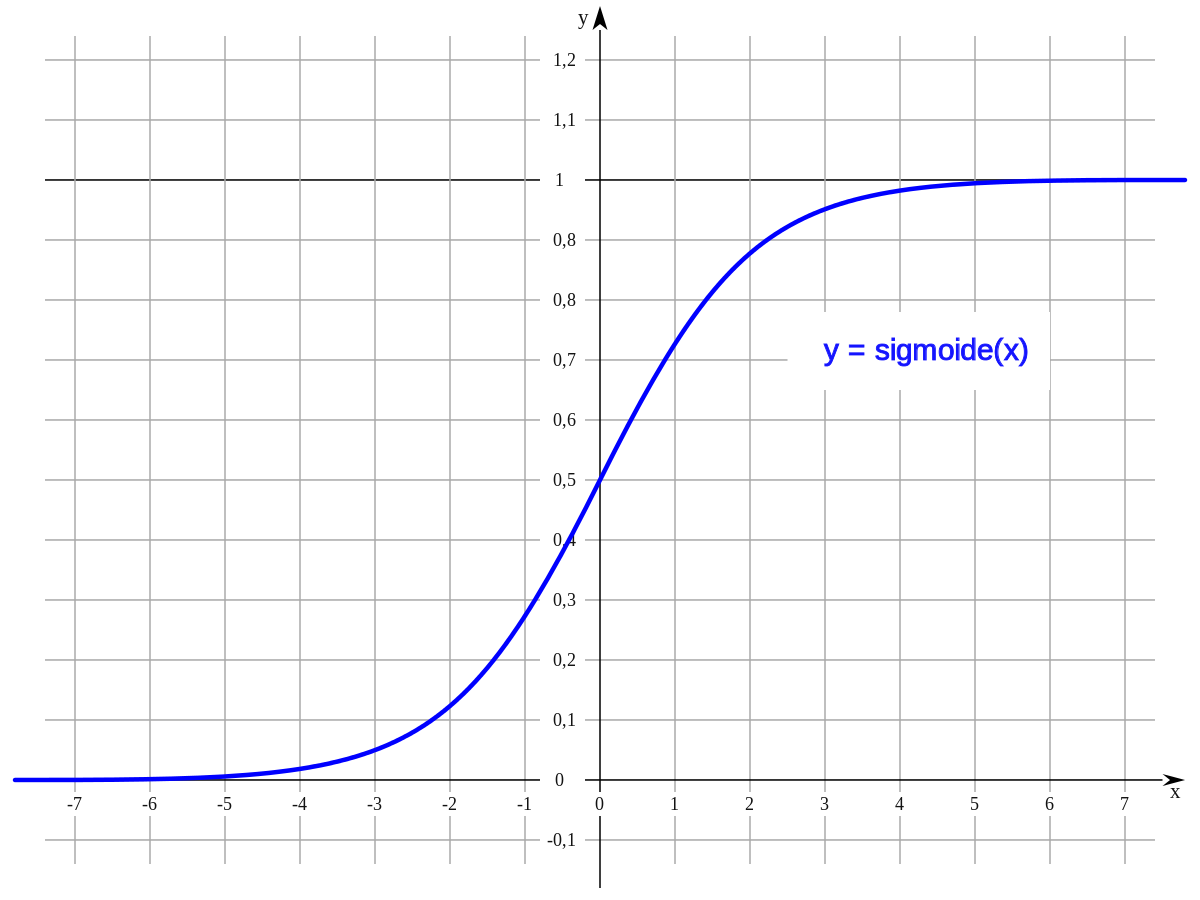

De esta forma, cualquier valor que consigamos con la combinación lineal de variables independientes de entrada (que sería el valor en el eje x de la función sigmoide), puede ser transformada en un valor entre 0 y 1 (que sería el valor en el eje y de la función sigmoide) y sería el valor final que nos devolvería el modelo. 

La regresión logística es un modelo más sencillo que otras versiones que veremos después y por lo tanto es una buena opción para poder utilizar en problemas donde hay pocas variables independientes de entrada por la alta velocidad a la que se puede entrenar. Sin embargo, si el número de variables independiente comienza a crecer, este modelo tiene algunos problemas de rendimiento. 

Vamos a ver con un ejemplo cómo utilizar la regresión logística utilizando la librería de scikit-learn

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report

In [23]:
# Cargamos los datos sobre el accidente del titanic, uno de los datasets más utilizados en problemas de clasificación
df_train = pd.read_csv('train_titanic.csv')

Ahora que tenemos los datos, ¿qué podríamos mirar para hacernos una idea de los datos con los que vamos a trabajar? EDA!

Vamos a preparar un poco nuestros datos para poder trabajar con el modelo de random forests, dado que los datos tienen algunas variables independientes categóricas (no numéricas) que necesitamos transformar para incluir en el modelo. 

In [24]:
# Algo importante a la hora de trabajar con este set de datos y con cualquier otro es mirar si tiene 
# variables categóricas (no numéricas) porque necesitamos transformarlas a numéricas para poder proporcionárselo al modelo
df_train['Embarked'].fillna(value='S',inplace=True)
df_train['Fare'].fillna(value=df_train['Fare'].mean(),inplace=True)
df_train['Age'].fillna(value=0,inplace=True)

In [25]:
sex_categories = {'female':0,'male':1}
# Vamos a utilizar la función map para transformar las variable del sexo del pasajero a numérica
df_train['Sex'] = df_train['Sex'].map(sex_categories)

In [26]:
# Para el puerto de embarque,vamos a utilzar una técnica que se llama one-hot encoding
one_hot_encoding_train = pd.get_dummies(df_train['Embarked'])
df_train = pd.concat([df_train, one_hot_encoding_train], axis=1)
df_train= df_train.drop(['Embarked'],axis=1)

In [27]:
# Vamos a eliminar las columnas que no nos interesan
df_train = df_train.drop(['Name', 'Cabin', 'Ticket', 'Fare', 'PassengerId'], axis=1)

In [28]:
# Antes de crear el modelo hacemos la separación del set de entrenamiento y el set de pruebas
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'Survived'], df_train['Survived'], test_size=0.2, random_state=123)

In [29]:
# Creamos la instancia de nuestro modelo
lr = LogisticRegression()

In [30]:
# entrenamos el modelo con el set de datos de entrenamiento
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
# generamos predicciones para el set de datos de pruebas
y_predict = lr.predict(X_test)

In [32]:
# ahora vamos a ver qué tal lo ha hecho la regresión logística
pred_proba = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc

0.8681511470985156

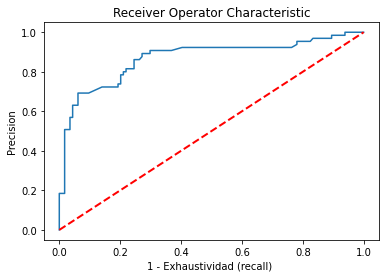

In [33]:
# vamos a pintar la curva del ROC / AUC
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

In [34]:
# Otras métrica que podemos sacar son la matriz de confusión del modelo
print(confusion_matrix(y_test, y_predict))

[[91 23]
 [17 48]]


In [35]:
# Scikit-learn también nos permite calcular fácilmente otras métricas como el F1-score, 
# la precisión del modelo y el recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       114
           1       0.68      0.74      0.71        65

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.78      0.78       179



¿Qué nuevas variables independientes podríamos crear que nos ayuden a tener un mejor comportamiento de nuestro modelo?. Prueba a hacerlo como ejercicio.

## Bosques aleatorios (Random Forest)

Los bosques aleatorios (random forest en inglés) son una colección de árboles de decisión que trabajan todos juntos para llegar a decidir cuál es la categoría final que el modelo debe devolver. 

Los árboles de decisión son algoritmos de clasificación muy fáciles de entender en los que marcamos condiciones para separar los datos en cada nodo de decisión del árbol para ir creando ramas que cada vez vayan teniendo menos datos y así poder asignar una categoría a cada separación final de los datos. 

Los árboles de decisión, aunque son fáciles de entender y visualizar, tienen una gran tendencia a sufrir overfitting y por eso no se utilizan por si solos. 

La idea del bosque aleatorio es que al poner a trabajar un grupo de árboles de decisión en común, se puede llegar a evitar ese overfitting que sufrirían cada uno de los árboles por separado. 

Cada árbol de decisión del bosque toma una selección aleatoria de las variables independientes de entrada al modelo e intenta predecir la categoría que le correspondería a los datos que damos al modelo. Una vez que todos los árboles han tomado una decisión sobre la categoría que le corresponde a los datos, la categoría que haya sido seleccionada por más árboles es considerada la ganadora y por lo tanto la categoría que decide el bosque aleatorio. 

Este promedio entre los resultados de los distintos árboles en el bosque ayuda a reducir la variabilidad del modelo y por lo tanto ayuda a combatir el overfitting que afecta a los árboles de decisión por separado. 

Los bosques aleatorios son muy versátiles y por lo tanto se adaptan muy bien a muchas situaciones y son capaces de ejecutarse sobre grandes bases de datos eficientemente sin tener que excluir ninguna variable independiente de la entrada. Es por esto, que los bosques aleatorios se consideran como el modelo base que se debe aplicar en los problemas de clasificación y que sirve para marcar el valor de referencia que deben superar otros modelos más complejos a la hora de comparar su desempeño.  

Vamos a ver un ejemplo de utilización de un bosque aleatorio:

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report

In [37]:
# Cargamos los datos sobre el accidente del titanic, uno de los datasets más utilizados en problemas de clasificación
df_train = pd.read_csv('train_titanic.csv')

Igual que hemos visto en la sección de la regresión logística, necesitamos preparar nuestros datos para poder dárselos al modelo.

In [38]:
# Algo importante a la hora de trabajar con este set de datos y con cualquier otro es mirar si tiene 
# variables categóricas (no numéricas) porque necesitamos transformarlas a numéricas para poder proporcionárselo al modelo
df_train['Embarked'].fillna(value='S',inplace=True)
df_train['Fare'].fillna(value=df_train['Fare'].mean(),inplace=True)
df_train['Age'].fillna(value=0,inplace=True)

In [39]:
sex_categories = {'female':0,'male':1}
# Vamos a utilizar la función map para transformar las variable del sexo del pasajero a numérica
df_train['Sex'] = df_train['Sex'].map(sex_categories)

In [40]:
# Para el puerto de embarque,vamos a utilzar una técnica que se llama one-hot encoding
one_hot_encoding_train = pd.get_dummies(df_train['Embarked'])
df_train = pd.concat([df_train, one_hot_encoding_train], axis=1)
df_train= df_train.drop(['Embarked'],axis=1)

In [41]:
# Vamos a eliminar las columnas que no nos interesan
df_train = df_train.drop(['Name', 'Cabin', 'Ticket', 'Fare','PassengerId'], axis=1)

In [42]:
# Antes de crear el modelo hacemos la separación del set de entrenamiento y el set de pruebas
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'Survived'], df_train['Survived'], test_size=0.2, random_state=123)

In [43]:
# finalmente creamos el modelo de random forest
rf = RandomForestClassifier()

In [44]:
# entrenamos el modelo con el set de entrenamiento
rf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# Y finalmente generamos predicciones para el set de pruebas
y_predict = rf.predict(X_test)

In [46]:
# ahora vamos a ver qué tal lo ha hecho el random forest
pred_proba = rf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc

0.8619433198380568

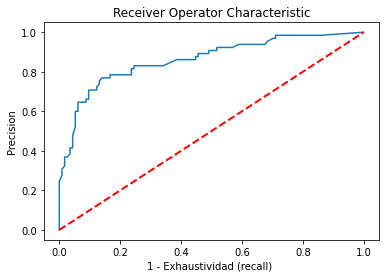

In [47]:
# vamos a pintar la curva del ROC / AUC
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

In [48]:
# Otras métrica que podemos sacar son la matriz de confusión del modelo
print(confusion_matrix(y_test, y_predict))

[[96 18]
 [15 50]]


In [49]:
# Scikit-learn también nos permite calcular fácilmente otras métricas como el F1-score, 
# la precisión del modelo y el recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       114
           1       0.74      0.77      0.75        65

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



Los bosques aleatorios nos permiten ver qué variables independientes de entrada tienen una mayor influencia a la hora de decidir la categoría en la que acaban siendo clasificados los datos. Esto es muy importante a la hora de sacar conclusiones y dar recomendaciones de cara a los negocios, puesto que permite identificar en qué variables tenemos que enfocar los esfuerzos para poder modificar el rendimiento del clasificador. 

Esta medida se llama la importancia de la variable independiente de entrada (que también se conocen como features). Vamos a ver el resultado para nuestro modelo:

In [50]:
features = X_train
feature_list = X_train.columns

# Guardamos los valores numéricos de la importancia de cada feature
importances = list(rf.feature_importances_)

# Vamos a crear un lista de tuplas con la variable independiente de entrada y su importancia
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

# Ordenamos las importancias de las variables para tener las más importantes al principio
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Mostramos las variables y sus importancias
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Age                  Importance: 0.3954
Variable: Sex                  Importance: 0.2992
Variable: Pclass               Importance: 0.123
Variable: SibSp                Importance: 0.0751
Variable: Parch                Importance: 0.0646
Variable: C                    Importance: 0.0174
Variable: S                    Importance: 0.0152
Variable: Q                    Importance: 0.0102


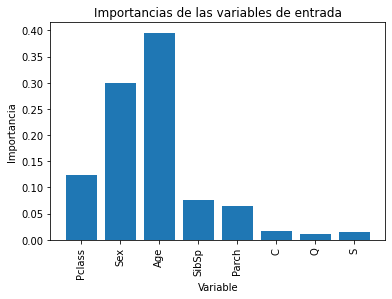

In [51]:
# También podemos tener una representación gráfica
# creamos una lista con tantas variables como vayamos a pintar
x_values = list(range(len(importances)))

# Creamos un gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical')

# Ponemos los nombres de las variables en el eje x
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
# Ponemos los nombres de los ejes y el título
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancias de las variables de entrada'); 

¿Qué modelo tiene mejor desempeño, la regresión logística o el random forest? 

¿Qué nuevas variables independientes podríamos crear que nos ayuden a tener un mejor comportamiento de nuestro modelo?. Prueba a hacerlo como ejercicio. 

## Modelos de ensamblado

Finalmente pasamos a ver los modelos de ensamblado. Conseguir que un modelo sea capaz de cubrir todas las diferentes opciones que tienen todas las variables independientes de entrada es complicado. Lo más normal es que falle en algunas situaciones con algunas variables independientes. 

Los modelos de ensamblado buscan corregir este problema combinando varios modelos que entre todos sean capaces de cubrir todas las posibles opciones de las variables independientes de entrada. 
En este ámbito cada modelo que está incluido dentro del modelo de ensamblado global se llama un estimador. El resultado final del modelo de ensamblado se calcula mirando el resultado individual de cada uno de los estimadores y escogiendo la categoría que ha sido seleccionada más veces. 

¿Te recuerda a algo? Efectivamente, los bosques aleatorios (random forest) toman la decisión final de la misma manera para reducir la variabilidad de cada uno de sus árboles de decisión y evitar caer en el overfitting. Los modelos de ensamblado utilizan la misma técnica para evitar el overfitting. 

¿Cúal es la diferencia entre un modelo de ensamblado y un bosque aleatorio? La principal diferencia es cómo se entrenan los estimadores en ambos tipos de modelos. 

En los bosques aleatorios, cada árbol de decisión recibe una selección aleatoria de las variables independientes de entrada para su entrenamiento y todos los árboles que forman parte de ese bosque aleatorio, se entrenan en paralelo. Esta técnica se llama bagging. 

En cambio, en los modelos de ensamblado cada estimador recibe todas las variables independientes de entrada para su entrenamiento y los estimadores se van entrenando de forma secuencial. Una vez el primer estimador ha acabado de entrenar con todos los datos, le pasa todos los datos de entrada al siguiente estimador y además le pasa información sobre qué variables independientes de entrada ha estimado peor, para que ese siguiente estimador pueda poner más énfasis en estimar bien esas variables de entrada y compensar los errores del primer estimador. Esta técnica se llama boosting.


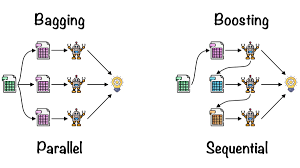

La forma en la que la se pasa la información de los errores que ha cometido un estimador al siguiente es la que diferencia a las distintas implementaciones de modelos de ensamblado. También podríamos crear nuestro propio modelo de ensamblado escogiendo nuestros propios estimadores y gestionando el paso de las variables independientes de entrada y los errores entre estimadores si las implementaciones ya existentes no cumplen nuestros criterios. 

Algunos ejemplos de implementaciones de modelos de ensamblado más famosas son: 

- Adaboost
- XGBoost
- LightGBM
- CatBoost

Vamos a ver un ejemplo de utilización del modelo de XGBoost:

In [52]:
from xgboost import XGBClassifier
import xgboost
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report

In [53]:
# Volvemos a cargar los datos sobre el accidente del titanic, uno de los datasets más utilizados en problemas de clasificación
df_train = pd.read_csv('train_titanic.csv')

Igual que hemos visto en las secciones anteriores, necesitamos preparar nuestros datos para poder dárselos al modelo.

In [54]:
# Algo importante a la hora de trabajar con este set de datos y con cualquier otro es mirar si tiene 
# variables categóricas (no numéricas) porque necesitamos transformarlas a numéricas para poder proporcionárselo al modelo
df_train['Embarked'].fillna(value='S',inplace=True)
df_train['Fare'].fillna(value=df_train['Fare'].mean(),inplace=True)
df_train['Age'].fillna(value=0,inplace=True)

In [55]:
sex_categories = {'female':0,'male':1}
# Vamos a utilizar la función map para transformar las variable del sexo del pasajero a numérica
df_train['Sex'] = df_train['Sex'].map(sex_categories)

In [56]:
# Para el puerto de embarque,vamos a utilzar una técnica que se llama one-hot encoding
one_hot_encoding_train = pd.get_dummies(df_train['Embarked'])
df_train = pd.concat([df_train, one_hot_encoding_train], axis=1)
df_train= df_train.drop(['Embarked'],axis=1)

In [57]:
# Vamos a eliminar las columnas que no nos interesan
df_train = df_train.drop(['Name', 'Cabin', 'Ticket', 'Fare', 'PassengerId'], axis=1)

In [58]:
# Antes de crear el modelo hacemos la separación del set de entrenamiento y el set de pruebas
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'Survived'], df_train['Survived'], test_size=0.2, random_state=123)

In [59]:
# vamos a crear nuestra instancia del modelo
xgb = XGBClassifier()

In [60]:
# Entrenamos el modelo con el set de datos de entrenamiento
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
# Podemos generar predicciones para el set de pruebas
y_predict = xgb.predict(X_test)

In [62]:
# ahora vamos a ver qué tal lo ha hecho el modelo XGBoost
pred_proba = xgb.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc

0.8695006747638326

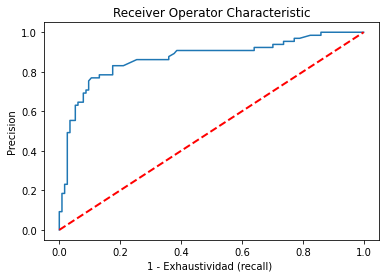

In [63]:
# vamos a pintar la curva del ROC / AUC
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

In [64]:
# Otras métrica que podemos sacar son la matriz de confusión del modelo
print(confusion_matrix(y_test, y_predict))

[[102  12]
 [ 15  50]]


In [65]:
# Scikit-learn también nos permite calcular fácilmente otras métricas como el F1-score, 
# la precisión del modelo y el recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.81      0.77      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



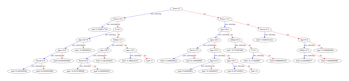

In [66]:
# El modelo XGBoost utiliza árboles de decisión con algunas modificaciones como estimadores del modelo
# Por lo que podemos visualizar las decisiones que ha ido tomando en cada árbol. En este ejemplo vamos a ver
# solo el primer árbol del modelo. 
xgboost.plot_tree(xgb,num_trees=0)
plt.show()

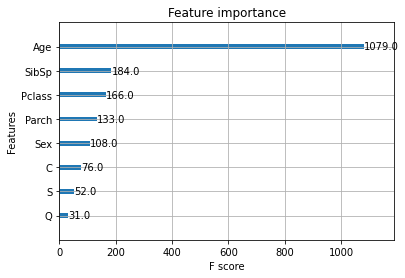

In [67]:
# igual que hemos visto en los bosques aleatorios (random forest), podemos ver cuáles de las variables de entrada
# tienen una mayor influencia a la hora de decidir la categoría en la que acaban siendo categorizados los datos
xgboost.plot_importance(xgb)
plt.show()

In [68]:
df_train.to_csv('train_titanic_df.csv', index=False) #Guardamos el csv con las transformaciones aplicadas previamente para poder trabajar cómodos

In [69]:
df_train_new = pd.read_csv('train_titanic_df.csv') #Cargamos el csv con las transformaciones 

In [70]:
df_train_new.head() #Visualizamos el csv

,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1


¿Cuál de los tres clasificadores tiene un mejor rendimiento con estos datos? ¿Puedes pensar en alguna variable que podamos añadir al modelo para poder mejorar su rendimiento?

## Adaboost

In [108]:
from sklearn.ensemble import AdaBoostClassifier


#Configurando valores
Dataset = df_train_new
X, y = Dataset.loc[:, Dataset.columns != 'Survived'], Dataset['Survived']

#Eliminamos outliers
def outliers(df):

    # Calculamos lamedia y desviación típica
    mean = df.mean()
    std = df.std()
    # Calulamos los valores de los outliers
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Calculamos los valores de los outliers
    outlier_min = Q1 - 1.5 * IQR
    outlier_max = Q3 + 1.5 * IQR
    # Filtramos los outliers
    df = df[(df >= outlier_min) & (df <= outlier_max)]
    return df

outliers(Dataset)

#Separando el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=32)

#Mezclamos los datos
X_train, X_test = X_train.sample(frac=1), X_test.sample(frac=1)

#Adaboost classifier
adatest = AdaBoostClassifier(n_estimators=1123, random_state=33)
adatest.fit(X_train, y_train)
y_pred = adatest.predict(X_test)

#Evaluando el modelo
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

acc_test2 = accuracy_score(y_test, y_pred2)
f1_test2 = f1_score(y_test, y_pred2, average= 'weighted')


print("Test set results")
print("ACCURACY",acc_test2)
print("F1 SCORE ",f1_test2)



Test set results
ACCURACY 0.7877094972067039
F1 SCORE  0.7865627369149352


### LightGBM

In [109]:
import lightgbm as lgb


#Configurando valores
Dataset = df_train_new
X, y = Dataset.loc[:, Dataset.columns != 'Survived'], Dataset['Survived']

#Eliminamos outliers
def outliers(df):

    # Calculamos lamedia y desviación típica
    mean = df.mean()
    std = df.std()
    # Calulamos los valores de los outliers
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Calculamos los valores de los outliers
    outlier_min = Q1 - 1.5 * IQR
    outlier_max = Q3 + 1.5 * IQR
    # Filtramos los outliers
    df = df[(df >= outlier_min) & (df <= outlier_max)]
    return df

outliers(Dataset)

#Separando el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=32)

#Mezclamos los datos
X_train, X_test = X_train.sample(frac=1), X_test.sample(frac=1)

#LightGBM
lightgbm = lgb.LGBMClassifier(n_estimators=2333, random_state=33)
lightgbm.fit(X_train, y_train)
y_pred = lightgbm.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print("Accuracy:",accuracy)


Accuracy: 0.5418994413407822


## CatBoost

In [110]:
#Catboost classifier
import catboost as Catboost
from catboost import CatBoostClassifier

#Configurando valores
Dataset = df_train_new
X, y = Dataset.loc[:, Dataset.columns != 'Survived'], Dataset['Survived']

#Eliminamos outliers
def outliers(df):

    # Calculamos lamedia y desviación típica
    mean = df.mean()
    std = df.std()
    # Calulamos los valores de los outliers
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Calculamos los valores de los outliers
    outlier_min = Q1 - 1.5 * IQR
    outlier_max = Q3 + 1.5 * IQR
    # Filtramos los outliers
    df = df[(df >= outlier_min) & (df <= outlier_max)]
    return df

outliers(Dataset)

#Separando el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=32)

#Mezclamos los datos
X_train, X_test = X_train.sample(frac=1), X_test.sample(frac=1)

#Catboost
catboost = CatBoostClassifier(n_estimators=1123, random_state=33)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)


Learning rate set to 0.008012
0:	learn: 0.6922844	total: 499us	remaining: 561ms
1:	learn: 0.6915347	total: 1.02ms	remaining: 574ms
2:	learn: 0.6909117	total: 1.52ms	remaining: 570ms
3:	learn: 0.6899951	total: 2.05ms	remaining: 573ms
4:	learn: 0.6893661	total: 2.56ms	remaining: 572ms
5:	learn: 0.6884027	total: 2.97ms	remaining: 553ms
6:	learn: 0.6875166	total: 3.39ms	remaining: 541ms
7:	learn: 0.6868278	total: 3.82ms	remaining: 533ms
8:	learn: 0.6860334	total: 4.25ms	remaining: 526ms
9:	learn: 0.6851627	total: 4.67ms	remaining: 519ms
10:	learn: 0.6844956	total: 5.07ms	remaining: 513ms
11:	learn: 0.6840883	total: 5.32ms	remaining: 492ms
12:	learn: 0.6832353	total: 5.73ms	remaining: 489ms
13:	learn: 0.6825379	total: 6.13ms	remaining: 485ms
14:	learn: 0.6819065	total: 6.54ms	remaining: 483ms
15:	learn: 0.6810184	total: 7.17ms	remaining: 496ms
16:	learn: 0.6804846	total: 7.57ms	remaining: 493ms
17:	learn: 0.6798910	total: 7.99ms	remaining: 490ms
18:	learn: 0.6794961	total: 8.27ms	remaining:

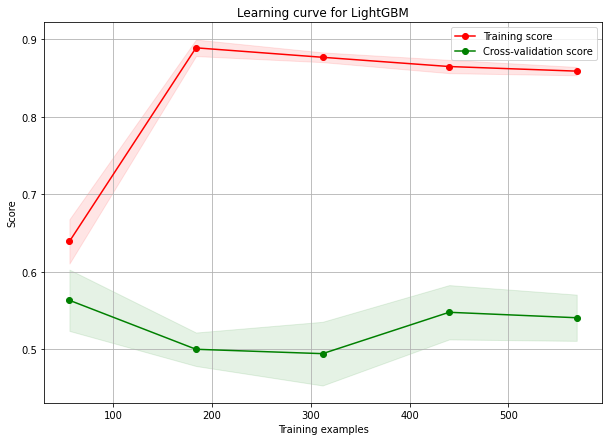

In [111]:
from sklearn.model_selection import learning_curve

#Dibujando la curva de aprendizaje de un modelo
def plot_learning_curve  (estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,7))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(lightgbm, "Learning curve for LightGBM", X_train, y_train, cv=5)
plt.show()



Learning rate set to 0.002705
0:	learn: 0.6925478	total: 1.1ms	remaining: 1.23s
1:	learn: 0.6919724	total: 1.46ms	remaining: 816ms
2:	learn: 0.6917375	total: 1.73ms	remaining: 645ms
3:	learn: 0.6911266	total: 2.01ms	remaining: 561ms
4:	learn: 0.6903698	total: 2.25ms	remaining: 504ms
5:	learn: 0.6897347	total: 2.5ms	remaining: 467ms
6:	learn: 0.6890083	total: 2.76ms	remaining: 439ms
7:	learn: 0.6886072	total: 3.04ms	remaining: 423ms
8:	learn: 0.6880687	total: 3.3ms	remaining: 408ms
9:	learn: 0.6878413	total: 3.46ms	remaining: 386ms
10:	learn: 0.6875918	total: 3.65ms	remaining: 369ms
11:	learn: 0.6867424	total: 3.89ms	remaining: 361ms
12:	learn: 0.6862638	total: 4.13ms	remaining: 352ms
13:	learn: 0.6860404	total: 4.27ms	remaining: 338ms
14:	learn: 0.6856824	total: 4.49ms	remaining: 332ms
15:	learn: 0.6851877	total: 4.73ms	remaining: 327ms
16:	learn: 0.6847728	total: 4.97ms	remaining: 323ms
17:	learn: 0.6839962	total: 5.2ms	remaining: 319ms
18:	learn: 0.6834376	total: 5.41ms	remaining: 31

<module 'matplotlib.pyplot' from '/home/dm/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

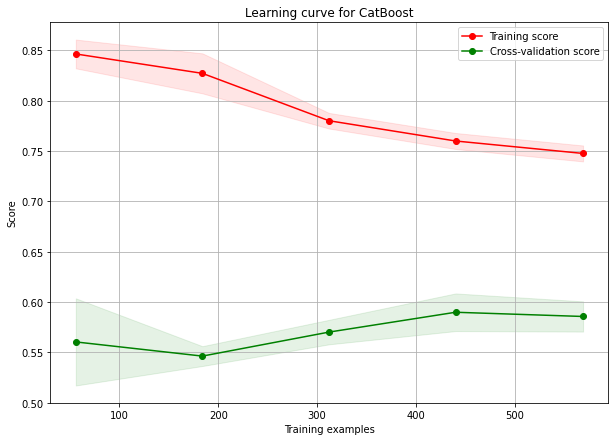

In [112]:
plot_learning_curve(catboost, "Learning curve for CatBoost", X_train, y_train, cv=5)

<module 'matplotlib.pyplot' from '/home/dm/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

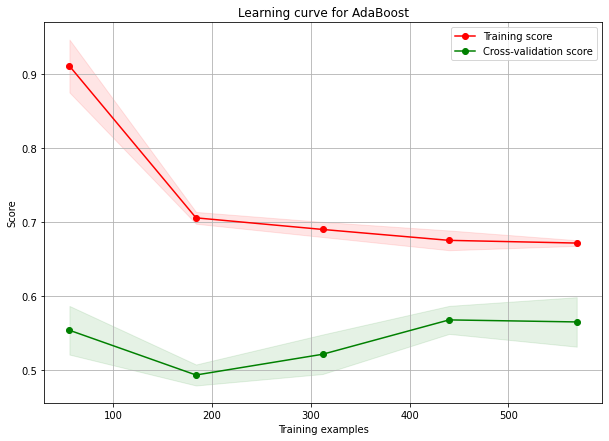

In [114]:
plot_learning_curve(adatest, "Learning curve for AdaBoost", X_train, y_train, cv=5)